## A. Checking and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/深度學習_HW2/heart_dataset_train_all.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [ ]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,1
cp,1
trestbps,1
chol,2
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(270, 14)

In [ ]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [ ]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [ ]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [ ]:
#Hyperparameter 實驗
import pandas as pd
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm


# 儲存結果
results = []

# 儲存每組曲線
metrics_by_setting = {}

# 超參數設定
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epochs = 100

# 模型類別
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

# 開始實驗
for lr in learning_rates:
    for bs in batch_sizes:
        print(f'\n=== Training with lr={lr}, batch_size={bs} ===')

        # 重新建立資料載入器
        train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)

        model = Model()
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [], []

        for epoch in range(epochs):
            # 訓練
            model.train()
            total_loss, correct, total = 0.0, 0, 0
            for features, labels in train_loader:
                features, labels = features.cuda(), labels.cuda()
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                pred = outputs.argmax(-1)
                correct += (pred == labels).sum().item()
                total += labels.size(0)
            lr_scheduler.step()
            train_losses.append(total_loss / len(train_loader))
            train_accuracies.append(correct / total * 100)

            # 驗證
            model.eval()
            val_loss, correct, total = 0.0, 0, 0
            with torch.no_grad():
                for features, labels in val_loader:
                    features, labels = features.cuda(), labels.cuda()
                    outputs = model(features)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    pred = outputs.argmax(-1)
                    correct += (pred == labels).sum().item()
                    total += labels.size(0)
            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(correct / total * 100)

        # 儲存模型檔案 (.pth)
        model_filename = f"model_lr{lr}_bs{int(bs)}.pth"
        torch.save(model.state_dict(), model_filename)
        print(f"✅ Saved model: {model_filename}")

        # 儲存每組最後結果
        results.append({
            'Learning Rate': lr,
            'Batch Size': bs,
            'Train Accuracy': round(train_accuracies[-1], 2),
            'Validation Accuracy': round(val_accuracies[-1], 2),
            'Train Loss': round(train_losses[-1], 4),
            'Validation Loss': round(val_losses[-1], 4),
        })

        # 儲存整組時間序列資料
        key = f"lr={lr}_bs={bs}"
        metrics_by_setting[key] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        }

# 轉成 DataFrame 顯示最終結果表格
results_df = pd.DataFrame(results)
print("\n===== 超參數實驗結果（含模型檔） =====")
print(results_df)



=== Training with lr=0.001, batch_size=16 ===
✅ Saved model: model_lr0.001_bs16.pth

=== Training with lr=0.001, batch_size=32 ===
✅ Saved model: model_lr0.001_bs32.pth

=== Training with lr=0.001, batch_size=64 ===
✅ Saved model: model_lr0.001_bs64.pth

=== Training with lr=0.01, batch_size=16 ===
✅ Saved model: model_lr0.01_bs16.pth

=== Training with lr=0.01, batch_size=32 ===
✅ Saved model: model_lr0.01_bs32.pth

=== Training with lr=0.01, batch_size=64 ===
✅ Saved model: model_lr0.01_bs64.pth

=== Training with lr=0.1, batch_size=16 ===
✅ Saved model: model_lr0.1_bs16.pth

=== Training with lr=0.1, batch_size=32 ===
✅ Saved model: model_lr0.1_bs32.pth

=== Training with lr=0.1, batch_size=64 ===
✅ Saved model: model_lr0.1_bs64.pth

===== 超參數實驗結果（含模型檔） =====
   Learning Rate  Batch Size  Train Accuracy  Validation Accuracy  Train Loss  \
0          0.001          16           83.60                83.95      0.3605   
1          0.001          32           82.54                76.5

In [ ]:
results_df

,Learning Rate,Batch Size,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,0.001,16,83.60,83.95,0.3605,0.3886
1,0.001,32,82.54,76.54,0.4073,0.4245
2,0.001,64,78.31,77.78,0.4776,0.4461
3,0.010,16,86.24,86.42,0.3210,0.3344
4,0.010,32,85.71,91.36,0.2984,0.3835
5,0.010,64,82.01,81.48,0.3911,0.3708
6,0.100,16,53.44,56.79,0.6909,0.6986
7,0.100,32,77.25,81.48,0.4589,0.4062
8,0.100,64,53.44,56.79,0.6908,0.6823


#### Visualizing the model performance

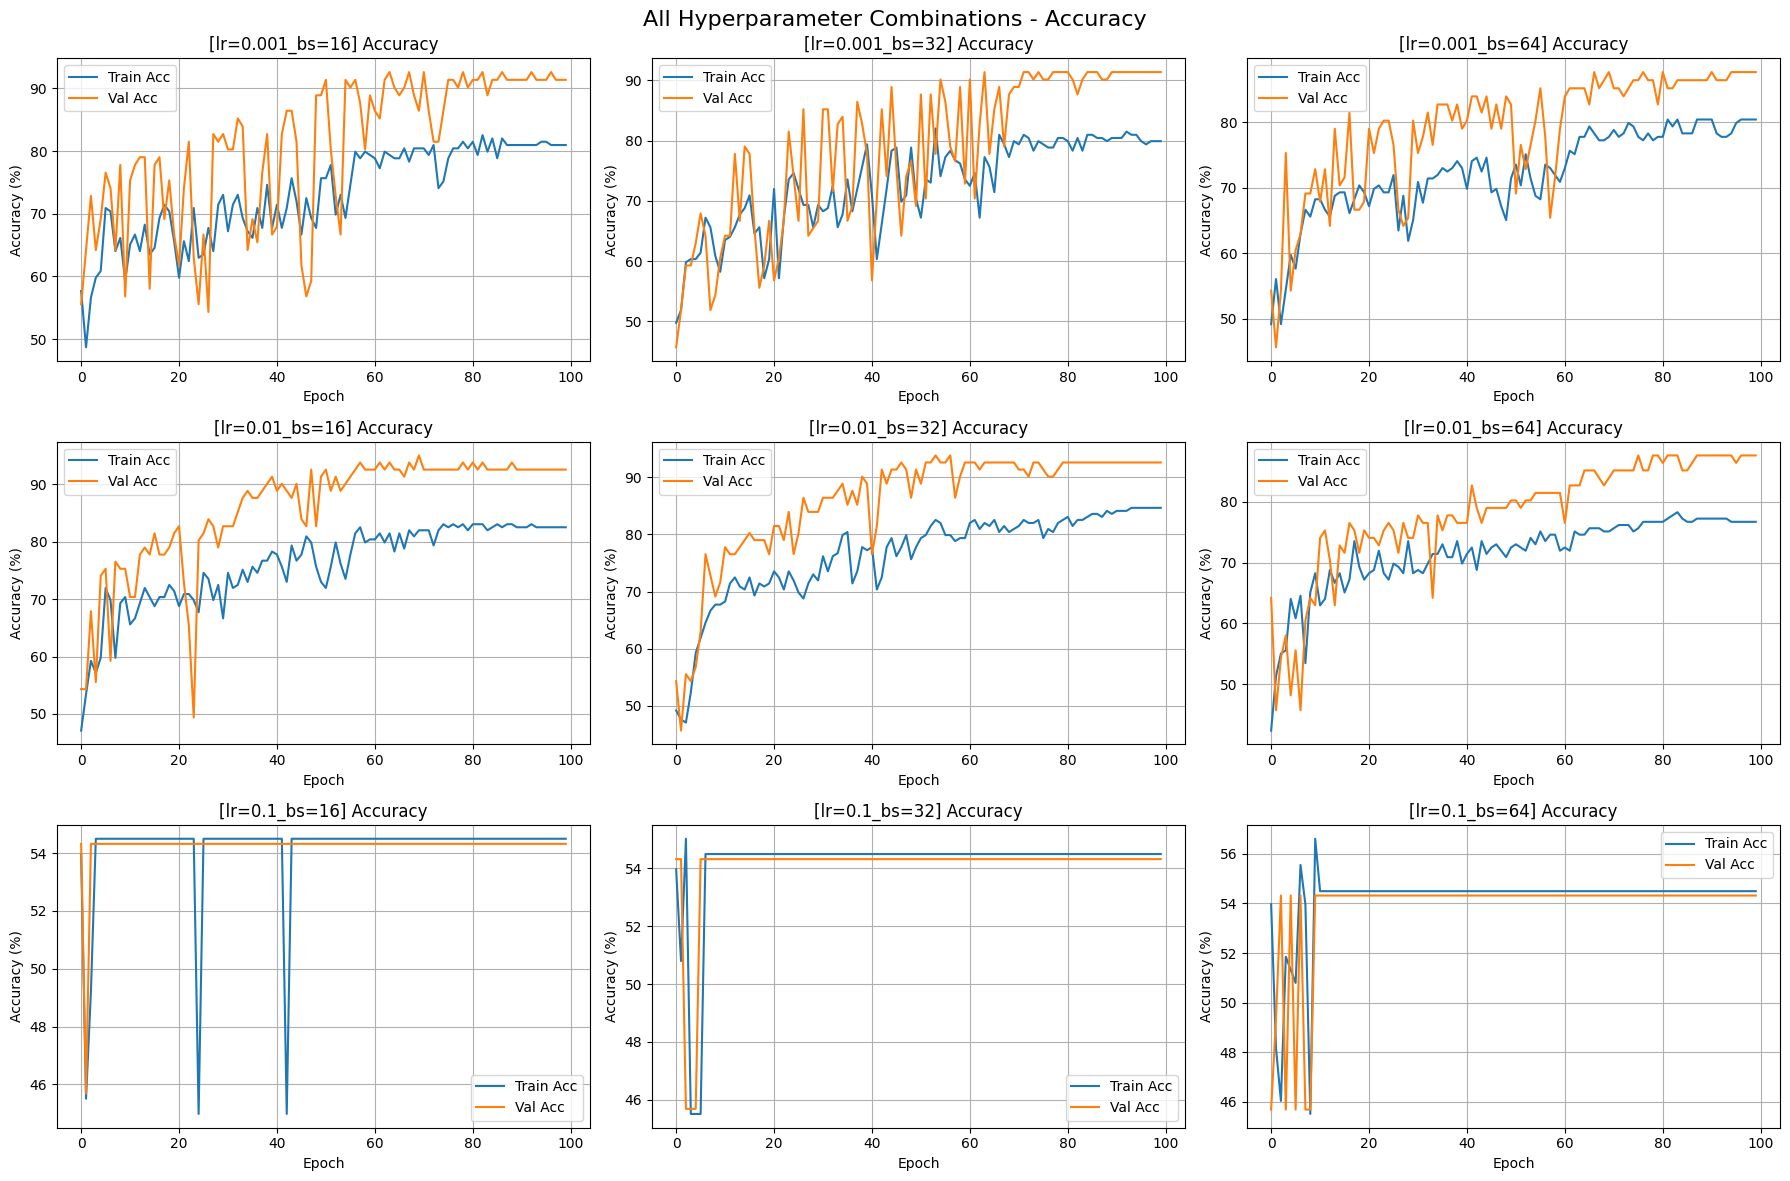

In [ ]:
#超參數實驗：驗證Train,Val, Test set的accuracy
import matplotlib.pyplot as plt

# 設定圖表的行數與列數（每行 3 個子圖）
num_combinations = len(metrics_by_setting)
cols = 3
rows = (num_combinations + cols - 1) // cols

# Accuracy 圖
fig_acc, axs_acc = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axs_acc = axs_acc.flatten()

for idx, (key, metrics) in enumerate(metrics_by_setting.items()):
    # Accuracy subplot
    ax_acc = axs_acc[idx]
    ax_acc.plot(metrics['train_accuracies'], label='Train Acc')
    ax_acc.plot(metrics['val_accuracies'], label='Val Acc')
    ax_acc.set_title(f"[{key}] Accuracy")
    ax_acc.set_xlabel("Epoch")
    ax_acc.set_ylabel("Accuracy (%)")
    ax_acc.legend()
    ax_acc.grid(True)

# 清除多餘的空圖
for idx in range(num_combinations, len(axs_acc)):
    axs_acc[idx].axis("off")
    axs_loss[idx].axis("off")

fig_acc.suptitle("All Hyperparameter Combinations - Accuracy", fontsize=16)
fig_loss.suptitle("All Hyperparameter Combinations - Loss", fontsize=16)

plt.tight_layout()
plt.show()


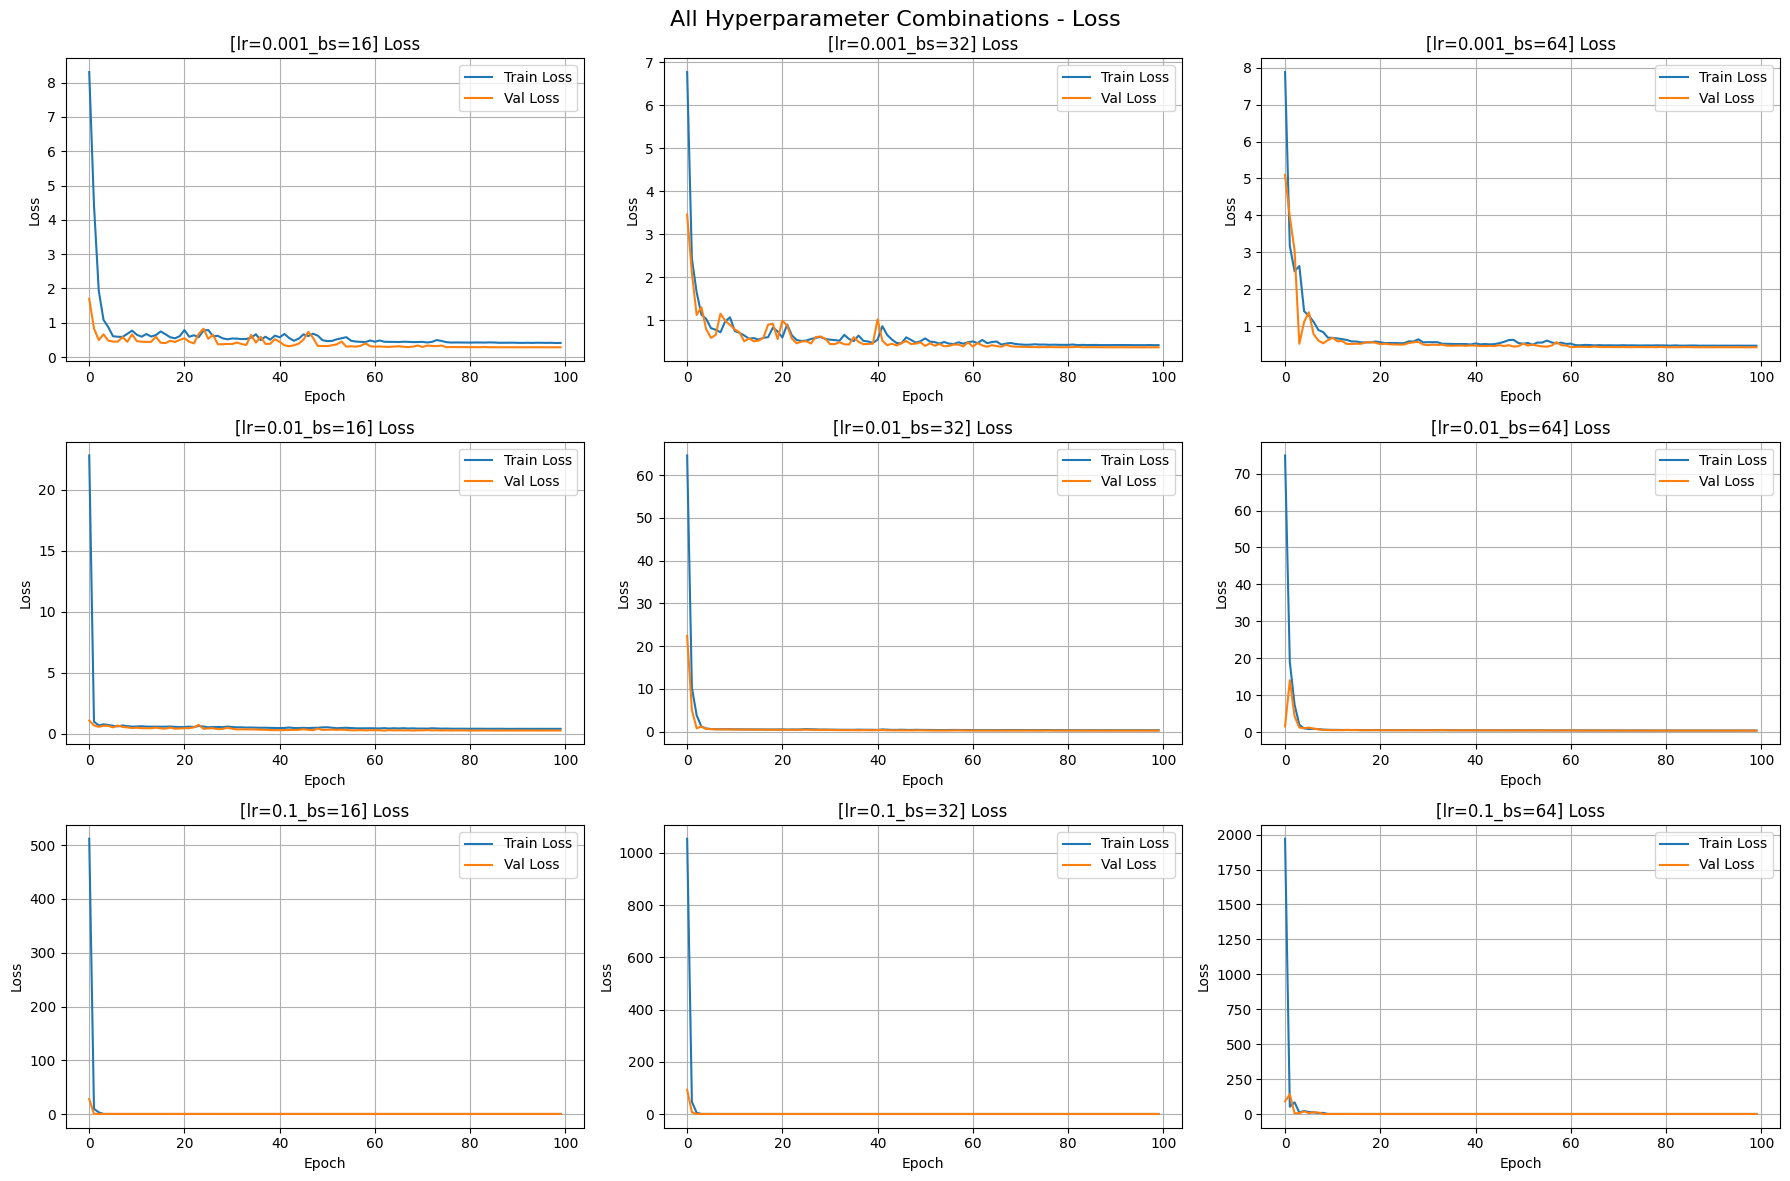

In [ ]:
#超參數實驗：驗證Train,Val, Test set的accuracy
import matplotlib.pyplot as plt

# 設定圖表的行數與列數（每行 3 個子圖）
num_combinations = len(metrics_by_setting)
cols = 3
rows = (num_combinations + cols - 1) // cols

# Loss 圖
fig_loss, axs_loss = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axs_loss = axs_loss.flatten()

for idx, (key, metrics) in enumerate(metrics_by_setting.items()):
    # Loss subplot
    ax_loss = axs_loss[idx]
    ax_loss.plot(metrics['train_losses'], label='Train Loss')
    ax_loss.plot(metrics['val_losses'], label='Val Loss')
    ax_loss.set_title(f"[{key}] Loss")
    ax_loss.set_xlabel("Epoch")
    ax_loss.set_ylabel("Loss")
    ax_loss.legend()
    ax_loss.grid(True)

# 清除多餘的空圖
for idx in range(num_combinations, len(axs_acc)):
    axs_acc[idx].axis("off")
    axs_loss[idx].axis("off")

fig_acc.suptitle("All Hyperparameter Combinations - Accuracy", fontsize=16)
fig_loss.suptitle("All Hyperparameter Combinations - Loss", fontsize=16)

plt.tight_layout()
plt.show()


## D. Evaluating Your Trained Model

In [ ]:
# read test file
test_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/深度學習_HW2/heart_dataset_test.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [ ]:
test_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
test_data = test_data.values
test_data.shape

(31, 14)

In [ ]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# 超參數組合實驗：驗證Test Set表現

# evaluation 函數
def evaluate_on_test(model, test_loader, criterion):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for features, labels in test_loader:
            features = features.cuda()
            labels = labels.cuda()
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            predicted = outputs.argmax(dim=1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    avg_loss = total_loss / len(test_loader)
    acc = correct / total * 100
    return round(acc, 2), round(avg_loss, 4)

# 儲存測試結果
test_accuracies = []
test_losses = []

# 評估每個模型
for idx, row in results_df.iterrows():
    lr = row['Learning Rate']
    bs = row['Batch Size']
    model_path = f"model_lr{lr}_bs{int(bs)}.pth"

    # 載入模型
    model = Model()
    model.load_state_dict(torch.load(model_path))
    model = model.cuda()
    criterion = nn.CrossEntropyLoss()

    # 評估
    test_acc, test_loss = evaluate_on_test(model, test_loader, criterion)
    test_accuracies.append(test_acc)
    test_losses.append(test_loss)
    print(f"[{model_path}] Test Accuracy: {test_acc}% | Test Loss: {test_loss}")

# 加入到 results_df 表格中
results_df["Test Accuracy"] = test_accuracies
results_df["Test Loss"] = test_losses

# 顯示最終完整表格
print("\n===== 完整實驗結果（含 Test Set）=====")
print(results_df)


[model_lr0.001_bs16.pth] Test Accuracy: 83.87% | Test Loss: 0.4507
[model_lr0.001_bs32.pth] Test Accuracy: 70.97% | Test Loss: 0.5476
[model_lr0.001_bs64.pth] Test Accuracy: 70.97% | Test Loss: 0.5842
[model_lr0.01_bs16.pth] Test Accuracy: 77.42% | Test Loss: 0.4424
[model_lr0.01_bs32.pth] Test Accuracy: 70.97% | Test Loss: 0.4672
[model_lr0.01_bs64.pth] Test Accuracy: 80.65% | Test Loss: 0.5088
[model_lr0.1_bs16.pth] Test Accuracy: 48.39% | Test Loss: 0.6999
[model_lr0.1_bs32.pth] Test Accuracy: 74.19% | Test Loss: 0.4671
[model_lr0.1_bs64.pth] Test Accuracy: 48.39% | Test Loss: 0.7

===== 完整實驗結果（含 Test Set）=====
   Learning Rate  Batch Size  Train Accuracy  Validation Accuracy  Train Loss  \
0          0.001          16           83.60                91.36      0.3725   
1          0.001          32           79.89                87.65      0.4317   
2          0.001          64           78.31                83.95      0.4697   
3          0.010          16           83.60          

In [ ]:
#最終實驗結果
results_df

,Learning Rate,Batch Size,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss,Test Accuracy,Test Loss
0,0.001,16,83.60,91.36,0.3725,0.2712,83.87,0.4507
1,0.001,32,79.89,87.65,0.4317,0.3916,70.97,0.5476
2,0.001,64,78.31,83.95,0.4697,0.4884,70.97,0.5842
3,0.010,16,83.60,92.59,0.3396,0.2227,77.42,0.4424
4,0.010,32,80.95,93.83,0.3862,0.2924,70.97,0.4672
5,0.010,64,83.60,86.42,0.3421,0.2980,80.65,0.5088
6,0.100,16,54.50,54.32,0.6885,0.7044,48.39,0.6999
7,0.100,32,82.54,87.65,0.4502,0.3163,74.19,0.4671
8,0.100,64,54.50,53.09,0.6893,0.6913,48.39,0.7000


[0.001, 0.01, 0.1]